In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from tinycp.classifier import OOBBinaryClassConditionalConformalClassifier
from tinycp.plot import efficiency_curve, reliability_curve, histogram, confusion_matrix, beta_pdf_with_cdf_fill
from sklearn.metrics import confusion_matrix as sklearn_confusion_matrix

In [2]:
weights = [0.2, 0.8]

X, y = make_classification(
    n_samples=100000, 
    n_features=20, 
    n_informative=2,      
    weights=weights, 
    random_state=42,
    n_redundant=2)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_calib, y_train, y_calib = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [4]:
rf = RandomForestClassifier(random_state=42, oob_score=True, n_jobs=-1, class_weight="balanced")
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', n_jobs=-1, oob_score=True,
                       random_state=42)

In [5]:
clf = OOBBinaryClassConditionalConformalClassifier(rf)
clf.fit(y_train)

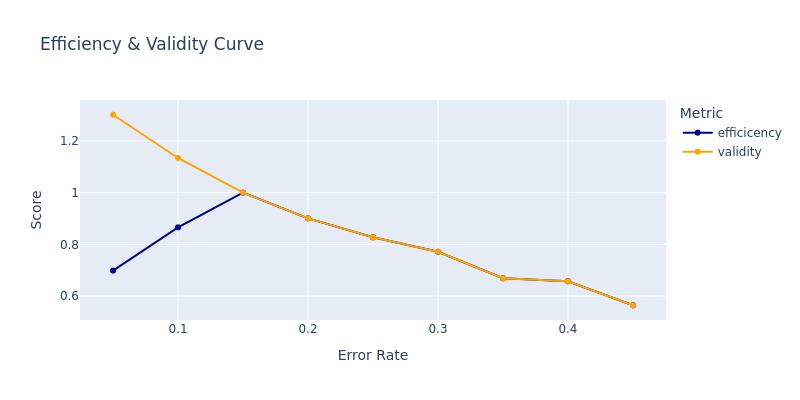

In [28]:
efficiency_curve(clf, X_test, "png")

In [7]:
clf.calibrate(X_calib, y_calib, func="mcc")


0.15

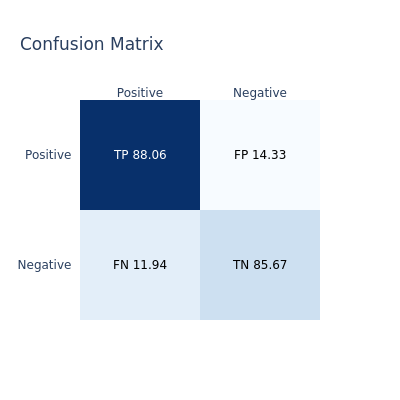

In [26]:
confusion_matrix(clf, X_test, y_test, fig_type="png")

In [9]:
clf.evaluate(X_test, y_test)

{'alpha': 0.15,
 'empirical_coverage': 0.785,
 'one_c': 1.0,
 'avg_c': 1.0,
 'empty': 0.0,
 'error': 0.124,
 'log_loss': 0.233,
 'ece': 0.004,
 'bm': 0.737,
 'mcc': 0.669,
 'f1': 0.919,
 'generalization': 0.042}

Random Forest

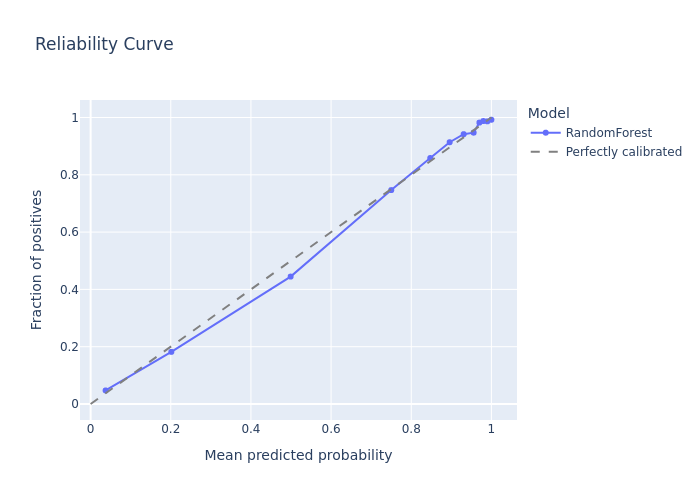

In [10]:
reliability_curve(clf.learner, X_test, y_test, 15,  "png")

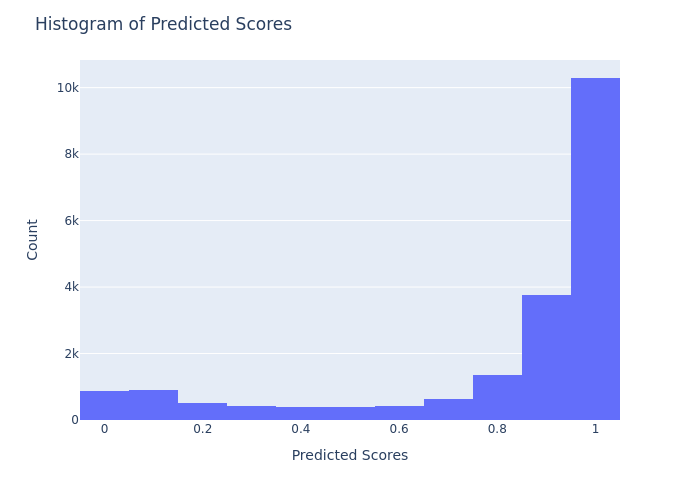

In [11]:
histogram(clf.learner, X_test, 15, "png")

Venn Abers

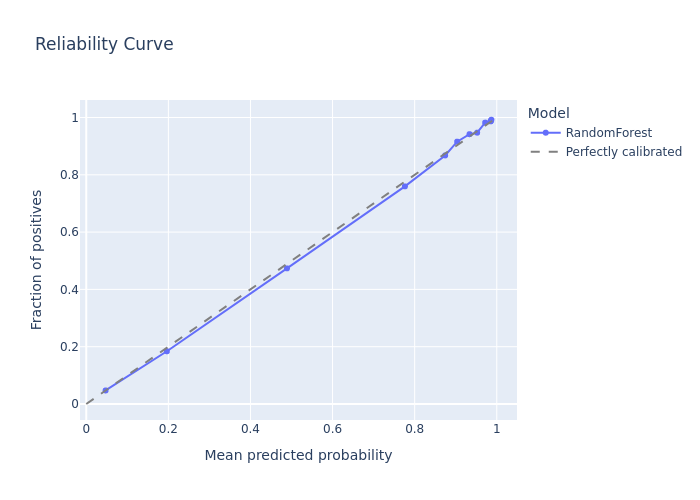

In [12]:
reliability_curve(clf, X_test, y_test, 15, "png")

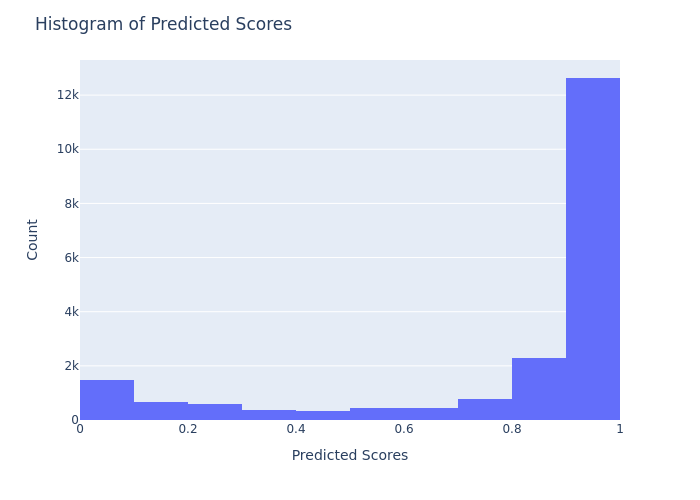

In [13]:
histogram(clf, X_test, 15, "png")

Alpha - 0.05

In [14]:
clf.evaluate(X_test, y_test, alpha=0.05)

{'alpha': 0.05,
 'empirical_coverage': 0.755,
 'one_c': 0.699,
 'avg_c': 1.301,
 'empty': 0.0,
 'error': 0.043,
 'log_loss': 0.233,
 'ece': 0.004,
 'bm': 0.737,
 'mcc': 0.669,
 'f1': 0.771,
 'generalization': 0.007}

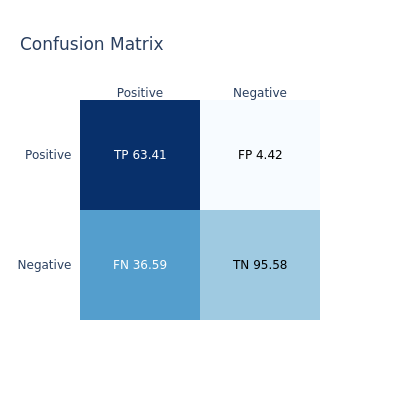

In [15]:
confusion_matrix(clf, X_test, y_test, alpha=0.05, fig_type="png")

Alpha - 0.10

In [16]:
clf.evaluate(X_test, y_test, alpha=0.10)

{'alpha': 0.1,
 'empirical_coverage': 0.77,
 'one_c': 0.866,
 'avg_c': 1.134,
 'empty': 0.0,
 'error': 0.084,
 'log_loss': 0.233,
 'ece': 0.004,
 'bm': 0.737,
 'mcc': 0.669,
 'f1': 0.861,
 'generalization': 0.007}

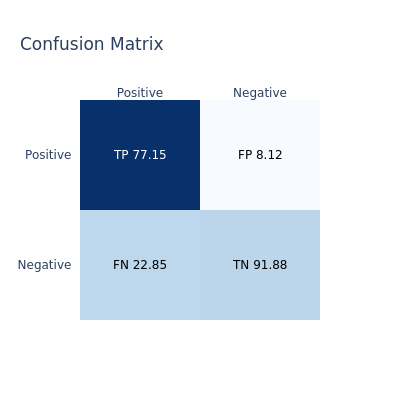

In [17]:
confusion_matrix(clf, X_test, y_test, alpha=0.10, fig_type="png")

In [18]:
tn, fp, fn, tp = sklearn_confusion_matrix(y_test, clf.predict(X_test)).ravel()

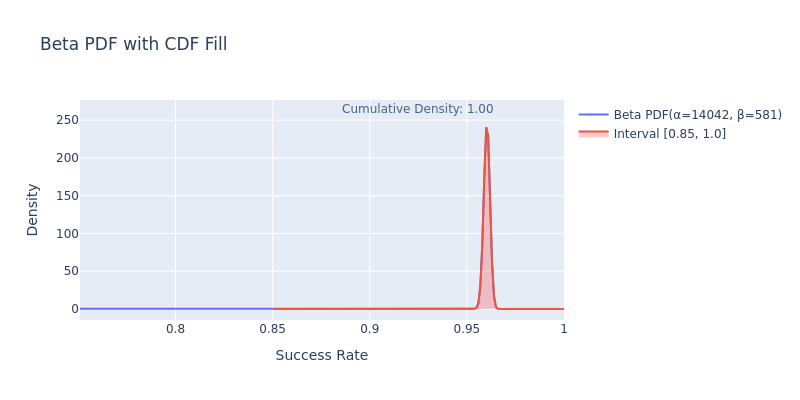

In [19]:
beta_pdf_with_cdf_fill(tp, fp, start=0.85, fig_type="png")

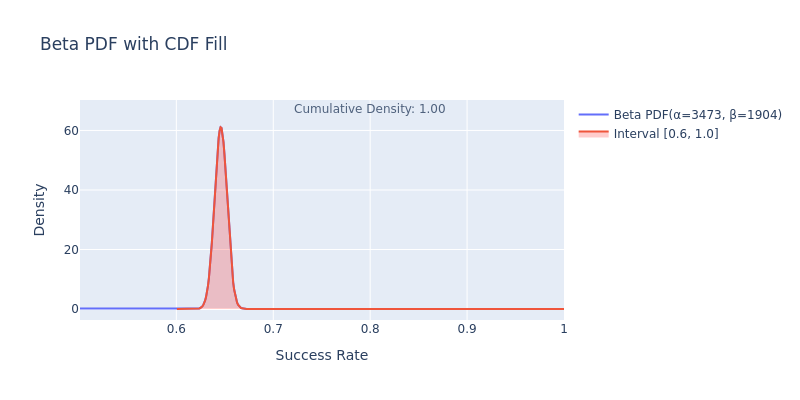

In [20]:
beta_pdf_with_cdf_fill(tn, fn, start=0.6, fig_type="png")